In [7]:
pip install tensorflow==2.8.0

In [26]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\raghu\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [27]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

from tensorflow.keras.models import Model

from tensorflow.keras.applications.resnet50 import ResNet50

from keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.models import Sequential

import numpy as np

import pandas as pd

from glob import glob

from tensorflow import keras

import matplotlib.pyplot as plt

In [10]:
IMAGE_SIZE = [224,224]
train_path = 'Downloads/train'  #Data set Collected from the Google/dataset_Diseasedplants&leafs
valid_path = 'Downloads/test'   #Data set Collected from the Google/dataset_Diseasedplants&leafs

In [11]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [12]:
for layer in resnet.layers:
    layer.trainable = False

In [13]:
folders = glob('Downloads/train/*')
#folders1 = glob('Downloads/test/*')

In [14]:
x = Flatten()(resnet.output)

In [15]:
len(folders)
#len(folders1)

4

In [16]:
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [18]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = "adam",
    metrics = ['accuracy']
)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
training_set = train_datagen.flow_from_directory('Downloads/train',
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 1951 images belonging to 4 classes.


In [21]:
test_set = test_datagen.flow_from_directory('Downloads/test',
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 18 images belonging to 4 classes.


In [22]:


# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
61/61 [==============================] - 216s 3s/step - loss: 2.4359 - accuracy: 0.3962 - val_loss: 1.0799 - val_accuracy: 0.5556
Epoch 2/5
61/61 [==============================] - 215s 4s/step - loss: 0.9379 - accuracy: 0.6176 - val_loss: 1.0173 - val_accuracy: 0.6111
Epoch 3/5
61/61 [==============================] - 221s 4s/step - loss: 1.2313 - accuracy: 0.5387 - val_loss: 0.8386 - val_accuracy: 0.6111
Epoch 4/5
61/61 [==============================] - 224s 4s/step - loss: 0.8825 - accuracy: 0.6392 - val_loss: 0.6497 - val_accuracy: 0.6111
Epoch 5/5
61/61 [==============================] - 226s 4s/step - loss: 0.8975 - accuracy: 0.6484 - val_loss: 0.9727 - val_accuracy: 0.6111


In [23]:
import matplotlib.pyplot as plt

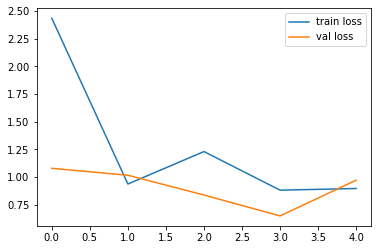

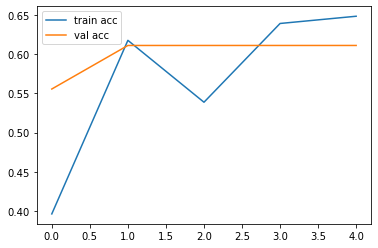

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:


# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_Cotton.h5')

In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred

array([[1.63262710e-02, 5.54076970e-01, 3.37258056e-02, 3.95870894e-01],
       [1.06529258e-02, 3.18282172e-02, 9.52442408e-01, 5.07652014e-03],
       [1.07691379e-03, 9.91608143e-01, 1.69836858e-04, 7.14514311e-03],
       [4.11747256e-03, 9.35052872e-01, 1.71753969e-02, 4.36542295e-02],
       [5.86799681e-01, 4.07235371e-03, 1.48579404e-02, 3.94270062e-01],
       [5.84173249e-03, 4.86261240e-04, 9.93396282e-01, 2.75669299e-04],
       [2.57140342e-02, 8.32508504e-01, 1.18219934e-01, 2.35575698e-02],
       [5.15350420e-03, 8.58208776e-01, 3.78133319e-02, 9.88244042e-02],
       [3.30655277e-03, 1.89067225e-03, 9.62852955e-01, 3.19498703e-02],
       [1.96170397e-02, 8.96822751e-01, 5.50534856e-03, 7.80548602e-02],
       [6.47946894e-02, 8.71813953e-01, 2.85945274e-02, 3.47967446e-02],
       [1.71061733e-03, 9.83741522e-01, 2.22159826e-04, 1.43256923e-02],
       [2.51604221e-03, 9.66856122e-01, 1.55698908e-02, 1.50579056e-02],
       [9.97192800e-01, 1.02006190e-04, 1.51957839e

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2], dtype=int64)

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('model_cotton.h5')

In [31]:
img=image.load_img('Downloads/test/fresh cotton leaf/3.jpg', target_size=(224,224))

In [32]:
x=image.img_to_array(img)
x

array([[[ 85.,  76.,  71.],
        [ 91.,  82.,  77.],
        [ 91.,  82.,  77.],
        ...,
        [ 60.,  56.,  45.],
        [ 62.,  57.,  51.],
        [ 66.,  61.,  55.]],

       [[ 99.,  90.,  85.],
        [112., 103.,  98.],
        [106.,  97.,  88.],
        ...,
        [ 66.,  57.,  52.],
        [ 66.,  61.,  55.],
        [ 65.,  60.,  54.]],

       [[119., 110., 101.],
        [105.,  96.,  91.],
        [142., 133., 124.],
        ...,
        [ 80.,  71.,  66.],
        [ 81.,  72.,  67.],
        [ 58.,  53.,  47.]],

       ...,

       [[176., 226., 153.],
        [171., 221., 148.],
        [173., 223., 150.],
        ...,
        [137., 185., 127.],
        [137., 185., 125.],
        [141., 189., 129.]],

       [[175., 225., 152.],
        [176., 226., 153.],
        [176., 226., 155.],
        ...,
        [133., 181., 123.],
        [132., 180., 120.],
        [138., 186., 126.]],

       [[173., 223., 150.],
        [167., 217., 146.],
        [175., 2

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255

In [35]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
model.predict(img_data)

array([[6.0700089e-01, 2.2255377e-10, 3.9299911e-01, 1.5324135e-08]],
      dtype=float32)

In [37]:
a=np.argmax(model.predict(img_data), axis=1)

In [38]:
if(a==1):
    print("Fresh Cotton Leaf")
else:
    print("Efected Cotton Leaf")

Efected Cotton Leaf


In [42]:
import tensorflow as tf

In [43]:
tf.__version__

'2.8.0'

In [39]:
a

array([0], dtype=int64)